In [1]:
import matplotlib.pyplot as plt
import numpy as np



**Nitsche method, exact intersections**

In [2]:
N_DoFS = np.array([289,   1089,   4225,  16641,  66049, 263169,1050625])
CPU_times_Nitsche = np.array([0.0156, 0.033,0.0924, 0.331,  1.34,  9.65,  70.1])
Accuracy_Nitsche = np.array([6.322e-02,1.554e-02,3.852e-03,9.593e-04,2.400e-04,6.009e-05,1.501e-05])

**Distributed Lagrange multipliers**

In [3]:
CPU_times_DLM = np.array([  0.028, 0.0394,  0.105,  0.404,   1.75,   10.4,   58.4])
Accuracy_DLM = np.array([8.952e-02,1.527e-02,3.779e-03,9.746e-04,2.377e-04,5.856e-05,1.479e-05])

**cutFEM**

In [4]:
CPU_Times_cutFEM = np.array([0.131, 0.25,0.528, 1.23, 3.29, 17.4,  112])
Accuract_cutFEM = np.array([ 9.3961e-02,2.0166e-02,4.4111e-03,1.0417e-03,2.4653e-04,6.0886e-05,1.4961e-05])

**Plotter**

<Figure size 432x288 with 0 Axes>

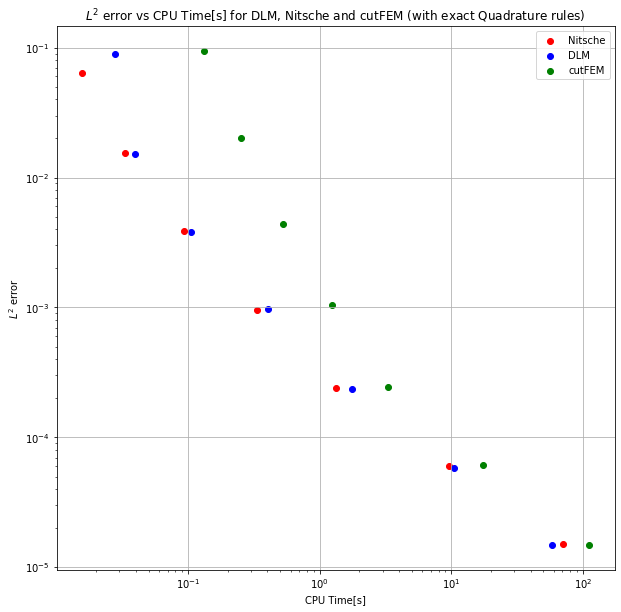

In [5]:
%matplotlib inline

fig = plt.figure()
plt.figure(figsize=[10,10])
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
ax.grid('on')
plt.xlabel('CPU Time[s]')
plt.ylabel('$L^2$ error')
ax.scatter(CPU_times_Nitsche , Accuracy_Nitsche , c='red', alpha=1., edgecolors='Face',label='Nitsche')
ax.scatter(CPU_times_DLM , Accuracy_DLM , c='blue', alpha=1., edgecolors='Face',label='DLM')
ax.scatter(CPU_Times_cutFEM , Accuract_cutFEM , c='green', alpha=1., edgecolors='Face',label='cutFEM')
ax.set_title("$L^2$ error vs CPU Time[s] for DLM, Nitsche and cutFEM (with exact Quadrature rules)")
lgd = ax.legend(loc='upper right')
plt.savefig('workingdiagram_test_1.png', bbox_inches='tight')

**Test2 (non smooth)**

In [6]:
N_DoFS = np.array([289,   1089,   4225,  16641,  66049, 263169,1050625])
CPU_times_Nitsche_2 = np.array([0.0156, 0.033,0.0924, 0.331,  1.34,  9.65,  70.1])
Accuracy_Nitsche_2= np.array([1.545e-02,4.777e-03,3.508e-03,1.927e-03,9.898e-04,4.374e-04,2.340e-04])

In [7]:
CPU_times_DLM_2 = np.array([  0.028, 0.0394,  0.105,  0.404,   1.75,   10.4,   58.4])
Accuracy_DLM_2= np.array([8.231e-02,1.882e-02,6.083e-03,2.994e-03,1.341e-03,4.988e-04,2.458e-04])

In [8]:
CPU_Times_cutFEM_2 = np.array([0.131, 0.25,0.528, 1.23, 3.29, 17.4,  112])
# Accuracy_cutFEM_2_inside= np.array([1.9179e-06,1.1859e-06,7.7874e-08,6.7360e-09,1.1748e-09,1.9686e-10,1.9828e-11])
Accuracy_cutFEM_2_outside= np.array([9.1487e-03,1.7871e-03,3.7113e-04,8.6818e-05,2.2034e-05,5.6084e-06,1.4155e-06])

<Figure size 432x288 with 0 Axes>

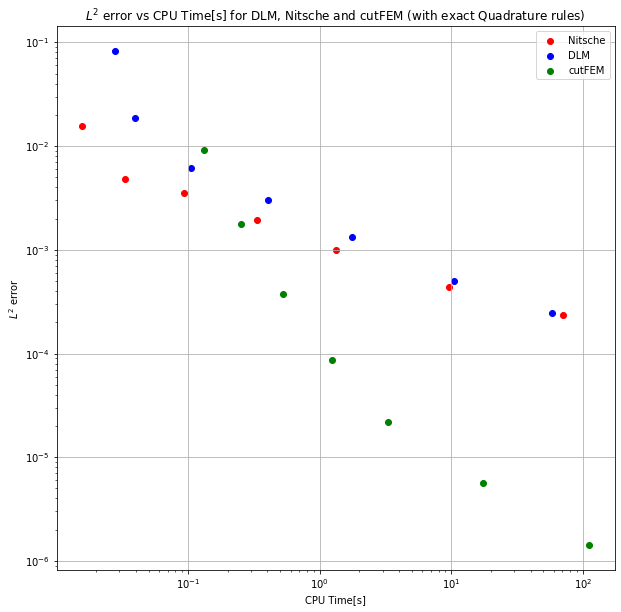

In [9]:

fig2 = plt.figure()
plt.figure(figsize=[10,10])
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
ax.grid('on')
plt.xlabel('CPU Time[s]')
plt.ylabel('$L^2$ error')
ax.scatter(CPU_times_Nitsche_2 , Accuracy_Nitsche_2 , c='red', alpha=1., edgecolors='Face',label='Nitsche')
ax.scatter(CPU_times_DLM_2 , Accuracy_DLM_2 , c='blue', alpha=1., edgecolors='Face',label='DLM')
# ax.scatter(CPU_Times_cutFEM_2 , Accuracy_cutFEM_2_inside , c='pink', alpha=1., edgecolors='Face',label='cutFEM_inside')
ax.scatter(CPU_Times_cutFEM_2 , Accuracy_cutFEM_2_outside , c='green', alpha=1., edgecolors='Face',label='cutFEM')
ax.set_title("$L^2$ error vs CPU Time[s] for DLM, Nitsche and cutFEM (with exact Quadrature rules)")
lgd = ax.legend(loc='upper right')
plt.savefig('workingdiagram_test_2.png', bbox_inches='tight')

**Sensitivity w.r.t penalty parameters $\beta$**

In [10]:
def plotter(a,b,c,d,test_type = 'Nitsche',n_test=1):
  fig3 = plt.figure()
  plt.figure(figsize=[10,10])
  ax = plt.gca()
  ax.set_yscale('log')
  ax.set_xscale('log')
  ax.grid('on')
  plt.xlabel('CPU Time[s]')
  plt.ylabel('$L^2$ error')
  ax.scatter(a[0] , a[1] , c='red', alpha=1., edgecolors='Face',label="$\\beta=10$")
  ax.scatter(b[0] , b[1] , c='blue', alpha=1., edgecolors='Face',label='$\\beta=100$')
  ax.scatter(c[0] , c[1] , c='green', alpha=1., edgecolors='Face',label='$\\beta=1e3$')
  ax.scatter(d[0] , d[1] , c='violet', alpha=1., edgecolors='Face',label='$\\beta=1e4$')
  ax.set_title("$L^2$ error vs CPU Time[s] for different values of penalty $\\beta$. Test "+str(n_test))
  lgd = ax.legend(loc='upper right')
  plt.savefig('penalty_'+test_type+'_sensitivity'+str(n_test)+'.png', bbox_inches='tight')

Test 1

In [11]:
from copy import deepcopy

Acuracy_beta_10 = deepcopy(Accuracy_Nitsche)
CPU_Times_beta_10 = deepcopy(CPU_times_Nitsche)


In [12]:
Acuracy_beta_100 = np.array([8.113e-02,1.826e-02,4.299e-03,1.031e-03,2.593e-04,6.543e-05,1.630e-05])
CPU_Times_beta_100 = np.array([0.0166,0.0353,0.0993, 0.407,  1.49,  10.9,  99.3])

In [13]:
Acuracy_beta_1000 = np.array([ 1.264e-01,2.672e-02,6.078e-03,1.451e-03,3.419e-04,8.493e-05,2.169e-05])
CPU_Times_beta_1000 = np.array([ 0.0152, 0.0338,  0.104,  0.406,   1.53,   11.5,   81.8])

In [14]:
Acuracy_beta_10000 = np.array([1.893e-01,4.807e-02,1.037e-02,2.651e-03,5.967e-04,1.388e-04,3.406e-05])
CPU_Times_beta_10000 = np.array([ 0.0189, 0.042, 0.119, 0.512,  1.77,  11.9,  80.3])

<Figure size 432x288 with 0 Axes>

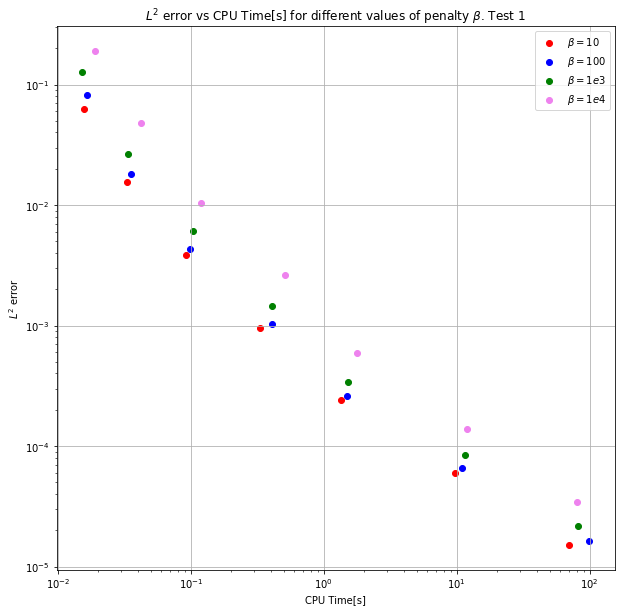

In [15]:
plotter([CPU_Times_beta_10,Acuracy_beta_10],[CPU_Times_beta_100,Acuracy_beta_100],[CPU_Times_beta_1000,Acuracy_beta_1000],[CPU_Times_beta_10000,Acuracy_beta_10000])

Test 2

In [16]:
Acuracy_beta_10_2 = deepcopy(Accuracy_Nitsche_2)
CPU_Times_beta_10_2 = deepcopy(CPU_times_Nitsche_2)

In [17]:
Acuracy_beta_100_2 = np.array([3.225e-02,1.233e-02,7.180e-03,3.664e-03,1.881e-03,8.970e-04,4.597e-04])
CPU_Times_beta_100_2 = np.array([0.0163,0.0353,0.0924, 0.394,  1.71,    14,   109])

In [18]:
Acuracy_beta_1000_2 = np.array([4.570e-02,1.672e-02,9.497e-03,4.619e-03,2.322e-03,1.112e-03,5.751e-04])
CPU_Times_beta_1000_2 = np.array([0.0136,0.0381, 0.126, 0.438,  1.65,  13.1,  93.5])

In [19]:
Acuracy_beta_10000_2 = np.array([6.677e-02,2.305e-02,1.246e-02,6.022e-03,2.958e-03,1.412e-03,7.197e-04])
CPU_Times_beta_10000_2 = np.array([0.0175,0.0374, 0.187, 0.557,  1.83,  13.7,  95.4])

<Figure size 432x288 with 0 Axes>

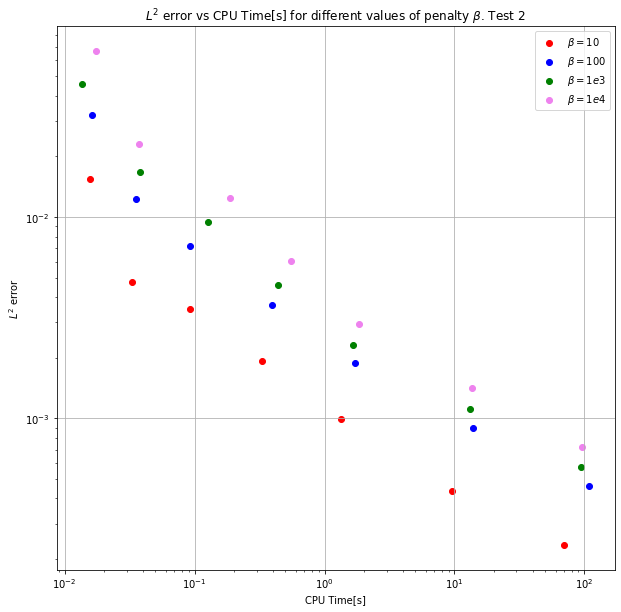

In [20]:
plotter([CPU_Times_beta_10_2,Acuracy_beta_10_2],[CPU_Times_beta_100_2,Acuracy_beta_100_2],[CPU_Times_beta_1000_2,Acuracy_beta_1000_2],[CPU_Times_beta_10000_2,Acuracy_beta_10000_2],n_test=2)

cutFEM, Test1

In [21]:

Acuracy_beta_10_cutFEM = deepcopy(Accuract_cutFEM)
CPU_Times_beta_10_cutFEM = deepcopy(CPU_Times_cutFEM)

In [22]:
Acuracy_beta_100_cutFEM = np.array([5.7611e-02,1.2875e-02,3.1118e-03,7.5703e-04,1.8613e-04,4.5960e-05,1.1427e-05])
CPU_Times_beta_100_cutFEM = np.array([ 0.118, 0.301,  0.64,  1.55,     5,  32.2,   257])

In [23]:
Acuracy_beta_1000_cutFEM = np.array([6.1676e-02,1.3559e-02,3.1072e-03,7.5439e-04,1.8434e-04,4.5535e-05,1.1329e-05])
CPU_Times_beta_1000_cutFEM = np.array([0.146,0.323,0.897, 2.43, 9.21, 77.1,  683])

In [24]:
Acuracy_beta_10000_cutFEM = np.array([1.0031e-01,2.2766e-02,3.5087e-03,8.8702e-04,1.9646e-04,4.5744e-05,1.1269e-05])
CPU_Times_beta_10000_cutFEM = np.array([0.156,0.385,  1.2, 4.13, 19.9,  201,2e+03])

<Figure size 432x288 with 0 Axes>

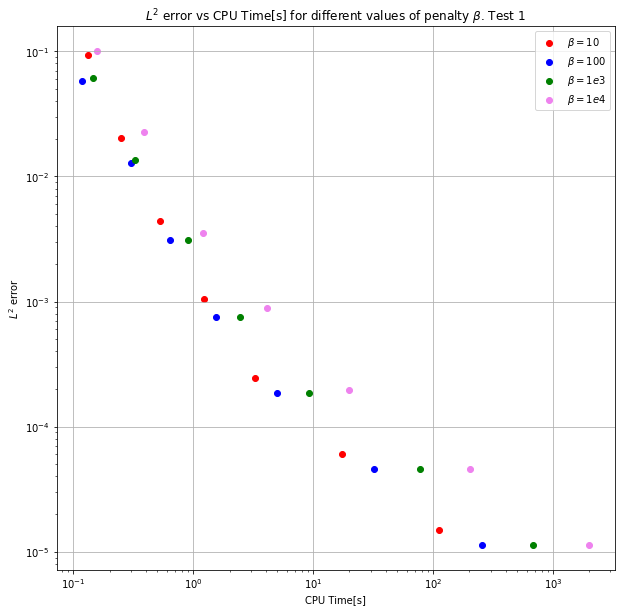

In [25]:
plotter([CPU_Times_beta_10_cutFEM,Acuracy_beta_10_cutFEM],[CPU_Times_beta_100_cutFEM,Acuracy_beta_100_cutFEM],[CPU_Times_beta_1000_cutFEM,Acuracy_beta_1000_cutFEM],[CPU_Times_beta_10000_cutFEM,Acuracy_beta_10000_cutFEM],'cutFEM',n_test=1)

Test 2

In [26]:

Acuracy_beta_10_cutFEM_2 = deepcopy(Accuracy_cutFEM_2_outside)
CPU_Times_beta_10_cutFEM_2 = deepcopy(CPU_Times_cutFEM_2)

In [27]:
Acuracy_beta_100_cutFEM_2 = np.array([7.2879e-03,1.2228e-03,2.4199e-04,5.3246e-05,1.1324e-05,2.6442e-06,6.6996e-07])
CPU_Times_beta_100_cutFEM_2 = np.array([0.148,0.33,0.72,1.74,5.75,41.9, 319])

In [28]:
Acuracy_beta_1000_cutFEM_2 = np.array([7.6830e-03,1.3296e-03,3.4537e-04,7.8107e-05,1.2506e-05,2.4644e-06,6.1114e-07])
CPU_Times_beta_1000_cutFEM_2 = np.array([ 0.152,0.321,0.909, 2.66,   11,  103,  918])

In [29]:
Acuracy_beta_10000_cutFEM_2 = np.array([1.1846e-02,2.0984e-03,6.9200e-04,2.2295e-04,2.8925e-05,4.1771e-06,9.1488e-07])
CPU_Times_beta_10000_cutFEM_2 = np.array([    0.156,   0.411,    1.27,    4.88,    25.4,     252,2.52e+03])

<Figure size 432x288 with 0 Axes>

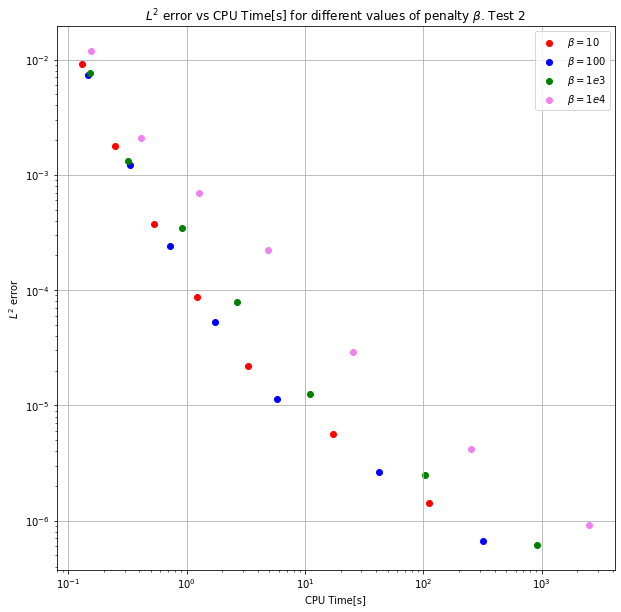

In [30]:
plotter([CPU_Times_beta_10_cutFEM_2,Acuracy_beta_10_cutFEM_2],[CPU_Times_beta_100_cutFEM_2,Acuracy_beta_100_cutFEM_2],[CPU_Times_beta_1000_cutFEM_2,Acuracy_beta_1000_cutFEM_2],[CPU_Times_beta_10000_cutFEM_2,Acuracy_beta_10000_cutFEM_2],'cutFEM',n_test=2)